# Plotbot Audification Examples 🔊🌞

## Parker Solar Probe Encounter 24 - Perihelion Audification

**Encounter 24**: June 19, 2025 at 09:09 UTC  
**Distance**: ~3.8 million miles from Sun's surface (~0.046 AU, 9.9 solar radii)  
**Time Range**: June 16-22, 2025 (±3 days from perihelion)

This notebook demonstrates how to create audio representations of Parker Solar Probe magnetic field data during its closest approach to the Sun. The audification process converts time series data into audio, allowing us to "hear" the solar wind and magnetic field variations.

### Data Availability Note 📊
- **Encounter 24 data**: May still be processing (typical latency: few months to 1 year)
- **Internal servers**: May have preliminary data sooner than public release
- **Fallback**: Will attempt Encounter 23 (March 22, 2025) if E24 data unavailable


In [ ]:
# Import plotbot and initialize
from plotbot import *
import numpy as np
from datetime import datetime, timedelta


initialized server_access
initialized global_tracker
initialized ploptions
initialized plot_manager
initialized epad class
initialized epad_hr class
initialized proton class
initialized proton_hr class
initialized ham_class
initialized psp_alpha class
initialized psp_qtn class
initialized data_cubby.
initialized proton_fits class
initialized alpha_fits class
🔉 initialized audifier

Importing libraries, this may take a moment. Hold tight... 

✅ Imported standard libraries and utilities.
✅ Imported numpy, pandas, and scipy libraries.
✅ Imported matplotlib libraries.
✅ Imported cdflib, BeautifulSoup, requests, dateutil, and datetime libraries.

🤖 Plotbot Initialized
✨ Showdahodo initialized
Positional Data Helper Initialized
📈📉 Multiplot Initialized

🤖 Plotbot Initialized
📈📉 Multiplot Initialized
   Version: 2025_07_07_v2.82
   Commit: v2.82 DOCS: Update electric field example notebook (plotbot_dfb_electric_field_examples.ipynb)



## 🔧 Audifier Setup and Configuration

First, we'll configure the audifier with optimal settings for perihelion data analysis.


In [ ]:
# Configure save directory for audio files
SET_NEW_SAVE_DIRECTORY = False  # Set to True to choose a new save directory
audifier.select_save_dir(force_new=SET_NEW_SAVE_DIRECTORY)
print()


Prompting for new save directory (force_new=True). Current: '/Users/robertalexander/Dropbox/__Collaborations/_NASA/__HCS_Crossing_Catalogue/HCS_Crossings/E23'


2025-07-08 14:30:00.029 python[78801:18830706] The class 'NSOpenPanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


New save directory set: /Users/robertalexander/Dropbox/__Presentations_and_interviews/SWC_Magic_Spaceship/Solar_Perihelion_Audio


Button(button_style='info', description='Open Save Directory', style=ButtonStyle(), tooltip='Click to open the…

In [5]:
# Audifier configuration for perihelion data
audifier.markers_per_hour = 6  # Default: 1 marker every 30 seconds
audifier.markers_only = False   # Generate full audio, not just markers
audifier.quantize_markers = True  # Align markers to hourly boundaries
audifier.sample_rate = 22000     # Audio sample rate (Hz)
audifier.channels = 1            # Mono audio

print(f"🔊 Audifier configured:")
print(f"   Markers per hour: {audifier.markers_per_hour}")
print(f"   Sample rate: {audifier.sample_rate} Hz")
print(f"   Channels: {audifier.channels}")
print(f"   Markers only: {audifier.markers_only}")


🔊 Audifier configured:
   Markers per hour: 6
   Sample rate: 22000 Hz
   Channels: 1
   Markers only: False


## 🎯 Encounter 24 Time Ranges

Define multiple time ranges around the perihelion for different audification perspectives.


In [6]:
# Encounter 24 perihelion: June 19, 2025 at 09:09 UTC
perihelion_time = '2025-06-19 09:09:00.000'

# Define multiple time ranges for audification
time_ranges = {
    'full_week': ['2025-06-16 00:00:00.000', '2025-06-22 23:59:59.000'],  # ±3 days full range
    'perihelion_day': ['2025-06-19 00:00:00.000', '2025-06-19 23:59:59.000'],  # Full perihelion day
    'perihelion_6h': ['2025-06-19 06:09:00.000', '2025-06-19 12:09:00.000'],   # ±3 hours around perihelion
    'perihelion_2h': ['2025-06-19 08:09:00.000', '2025-06-19 10:09:00.000'],   # ±1 hour around perihelion
    'perihelion_30m': ['2025-06-19 08:54:00.000', '2025-06-19 09:24:00.000'],  # ±15 minutes around perihelion
}

print("🎯 Encounter 24 Time Ranges:")
for name, trange in time_ranges.items():
    print(f"   {name:15s}: {trange[0]} to {trange[1]}")


🎯 Encounter 24 Time Ranges:
   full_week      : 2025-06-16 00:00:00.000 to 2025-06-22 23:59:59.000
   perihelion_day : 2025-06-19 00:00:00.000 to 2025-06-19 23:59:59.000
   perihelion_6h  : 2025-06-19 06:09:00.000 to 2025-06-19 12:09:00.000
   perihelion_2h  : 2025-06-19 08:09:00.000 to 2025-06-19 10:09:00.000
   perihelion_30m : 2025-06-19 08:54:00.000 to 2025-06-19 09:24:00.000


## 🧲 Magnetic Field Data Loading

Load magnetic field data for the perihelion period. We'll try high-resolution RTN coordinates first.


🔍 Attempting to load Encounter 24 magnetic field data...
   Time range: 2025-06-16 00:00:00.000 to 2025-06-22 23:59:59.000
🤖 Plotbot starting...
🛰️ mag_RTN - acquiring variables: br
 
📥 Acquiring data for 1 regular variables...
🛰️ mag_RTN - acquiring variables: br
Attempting Berkeley acquisition path for mag_RTN...
File data/psp/fields/l2/mag_rtn/2025/psp_fld_l2_mag_RTN_2025061600_v00.cdf downloaded successfully.
File data/psp/fields/l2/mag_rtn/2025/psp_fld_l2_mag_RTN_2025061606_v00.cdf downloaded successfully.
File data/psp/fields/l2/mag_rtn/2025/psp_fld_l2_mag_RTN_2025061612_v00.cdf downloaded successfully.
File data/psp/fields/l2/mag_rtn/2025/psp_fld_l2_mag_RTN_2025061618_v00.cdf downloaded successfully.
File data/psp/fields/l2/mag_rtn/2025/psp_fld_l2_mag_RTN_2025061700_v00.cdf downloaded successfully.
File data/psp/fields/l2/mag_rtn/2025/psp_fld_l2_mag_RTN_2025061706_v00.cdf downloaded successfully.
File data/psp/fields/l2/mag_rtn/2025/psp_fld_l2_mag_RTN_2025061712_v00.cdf download

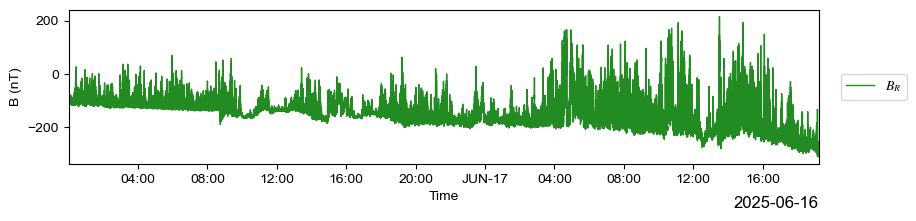

✅ Successfully loaded mag_rtn (high-res RTN)


In [11]:
# Try to load Encounter 24 data - high resolution magnetic field in RTN coordinates

print_manager.show_status = True
# print_manager.show_status = True


trange_full = time_ranges['full_week']
print(f"🔍 Attempting to load Encounter 24 magnetic field data...")
print(f"   Time range: {trange_full[0]} to {trange_full[1]}")

config.data_server = "berkeley"

# Attempt high-resolution RTN magnetic field data
plotbot(trange_full, mag_rtn.br, 1)
mag_data_available = True
mag_source = "mag_rtn (high-res RTN)"
print(f"✅ Successfully loaded {mag_source}")
# except Exception as e:
#     print(f"❌ mag_rtn_4sa failed: {e}")
#     try:
#         # Fallback to standard resolution RTN
#         plotbot(trange_full, mag_rtn.br, 1)
#         mag_data_available = True
#         mag_source = "mag_rtn (standard RTN)"
#         print(f"✅ Successfully loaded {mag_source}")
#     except Exception as e2:
#         print(f"❌ mag_rtn also failed: {e2}")
#         mag_data_available = False
#         mag_source = None


In [ ]:
if mag_data_available:
    # Ultra-high resolution around perihelion moment
    trange = time_ranges['perihelion_30m']
    print(f"🎵 Creating perihelion moment audification...")
    print(f"   Time range: {trange[0]} to {trange[1]}")
    print(f"   Duration: 30 minutes centered on perihelion")
    
    # Configure for high-time-resolution audio
    audifier.markers_per_hour = 240  # More markers for detailed time resolution
    
    if 'mag_rtn_4sa' in mag_source:
        # Use high-resolution data
        audifier.audify(trange, mag_rtn_4sa.br, mag_rtn_4sa.bt, mag_rtn_4sa.bn, mag_rtn_4sa.bmag)
    else:
        # Use standard resolution data
        audifier.audify(trange, mag_rtn.br, mag_rtn.bt, mag_rtn.bn, mag_rtn.bmag)
    
    print("✅ Perihelion moment audification complete!")
else:
    print("❌ Cannot create audification - no magnetic field data available")


In [ ]:
if mag_data_available:
    # Extended context around perihelion
    trange = time_ranges['perihelion_6h']
    print(f"🎵 Creating perihelion context audification...")
    print(f"   Time range: {trange[0]} to {trange[1]}")
    print(f"   Duration: 6 hours centered on perihelion")
    
    # Standard marker resolution for longer duration
    audifier.markers_per_hour = 120  # Standard resolution
    
    if 'mag_rtn_4sa' in mag_source:
        audifier.audify(trange, mag_rtn_4sa.br, mag_rtn_4sa.bt, mag_rtn_4sa.bn, mag_rtn_4sa.bmag)
    else:
        audifier.audify(trange, mag_rtn.br, mag_rtn.bt, mag_rtn.bn, mag_rtn.bmag)
    
    print("✅ Perihelion context audification complete!")
else:
    print("❌ Cannot create audification - no magnetic field data available")


In [ ]:
if not mag_data_available:
    print("🔄 Attempting fallback to Encounter 23 (March 22, 2025)...")
    
    # Encounter 23 time ranges  
    e23_ranges = {
        'perihelion_moment': ['2025-03-22 17:30:00.000', '2025-03-22 18:30:00.000'],
        'perihelion_day': ['2025-03-22 00:00:00.000', '2025-03-22 23:59:59.000'],
    }
    
    try:
        # Try Encounter 23 data
        trange_e23 = e23_ranges['perihelion_moment']
        print(f"🔍 Loading Encounter 23 data: {trange_e23[0]} to {trange_e23[1]}")
        
        plotbot(trange_e23, mag_rtn_4sa.br)
        
        print("✅ Encounter 23 data loaded successfully!")
        print("🎵 Creating Encounter 23 perihelion audification...")
        
        # Configure audifier for E23
        audifier.markers_per_hour = 120
        audifier.audify(trange_e23, mag_rtn_4sa.br, mag_rtn_4sa.bt, mag_rtn_4sa.bn, mag_rtn_4sa.bmag)
        
        print("✅ Encounter 23 audification complete!")
        
    except Exception as e:
        print(f"❌ Encounter 23 also failed: {e}")
        print("💡 Suggestion: Check data availability or try earlier encounters")
else:
    print("✅ Encounter 24 data was available - no fallback needed")
